# Number of accidents vs Weather conditions

## Accidents data preparation for Weather API

#### Loading packages

In [26]:
import pandas as pd 
import os
import numpy as np
import seaborn as sns
import json
from datetime import datetime
import matplotlib.pyplot as plt
import math
import csv
from geopy.geocoders import Nominatim
import geocoder
import time
import urllib.parse
import urllib.request

#### Expanding the number of columns of dataframe

In [6]:
pd.set_option('display.max_columns', None)

#### Loading data

Load accidents row data

In [7]:
accidents_raw = pd.read_csv('/Users/sabina/Documents/2022/project/data/raw/Accidents0515.csv')

Drop rows with missing values

In [8]:
accidents = accidents_raw.dropna()

Format date

In [9]:
accidents['Date'] = pd.to_datetime(accidents['Date'], format='%d/%m/%Y')

/var/folders/lc/3yknv_8x5832sztwzg33_tcw0000gn/T/ipykernel_17421/554119514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['Date'] = pd.to_datetime(accidents['Date'], format='%d/%m/%Y')


In [7]:
accidents = accidents.set_index('Date').sort_index()

To answer second analytical question on relationship between number of accidents and weather conditions we are using *Visualcrossing* Weather API. In order to use Weather API, we are adding city column using geocoder package. It takes hours to load cities, that is why we did it partly, that is by months or weeks). Since we have a limited access to Weather API with our subscription, we decided to filter data for accidents occured during 2015 year.

In [9]:
accidents_dec1 = accidents.loc['2015-12-01':'2015-12-07']

In [10]:
accidents_dec1.shape

(2700, 31)

Write a function with geocoder pachage to find city for each accident using latitude and longitude variables.

In [11]:
def city_name(x):
    g = geocoder.osm([x.Latitude, x.Longitude], method='reverse').json
    if g:
        return g.get('city')
    else:
        return 'no city'

Apply function

In [16]:
accidents_dec1['city'] = accidents_dec1[['Latitude', 'Longitude']].apply(city_name, axis=1)

/var/folders/lc/3yknv_8x5832sztwzg33_tcw0000gn/T/ipykernel_38605/2244529344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_dec1['city'] = accidents_dec1[['Latitude', 'Longitude']].apply(city_name, axis=1)


Save new dataframe with city column to csv file. 

In [17]:
accidents_dec1.to_csv('01122015-07122015.csv')

We repeated 5 previous steps for all selected date ranges to get data of 2015 year. Then loaded all data and consolidated them in *accidents_withcities* dataframe.

In [12]:
september = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01092015-30092015.csv',on_bad_lines='skip')
october = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01102015-31102015.csv',on_bad_lines='skip')
november = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01112015-30112015.csv',on_bad_lines='skip')

In [13]:
december = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01122015-31122015.csv',on_bad_lines='skip')
january = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01012015-31012015.csv',on_bad_lines='skip')
february = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01022015-28022015.csv',on_bad_lines='skip')

In [14]:
march = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01032015-31032015.csv',on_bad_lines='skip')
april = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01042015-30042015.csv',on_bad_lines='skip')
may = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01052015-31052015.csv',on_bad_lines='skip')

In [15]:
june = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01062015-30062015.csv',on_bad_lines='skip')
july = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01072015-31072015.csv',on_bad_lines='skip')
august = pd.read_csv('/Users/sabina/Documents/2022/project/data/cities/01082015-31082015.csv',on_bad_lines='skip')

In [16]:
accidents_withcities=pd.concat([january,february,march,april,may,june,july,august,september,october,november,december])

In [17]:
accidents_withcities.head(10)

,Date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,city,Accident_Index
0,2015-01-01,2015450021404,520918.0,165420.0,-0.264115,51.374969,45,3,1,1,5,17:29,38,E10000030,6,2099,6,30,0,-1,-1,0,0,0,7,1,2,0,0,1,1,E01030388,Epsom and Ewell,NaN
1,2015-01-01,2015450021402,521727.0,153984.0,-0.256400,51.272014,45,3,1,1,5,12:18,513,E10000030,1,25,3,70,0,-1,-1,0,0,0,1,2,2,0,0,2,1,E01030639,Reigate and Banstead,NaN
2,2015-01-01,2015460251429,558490.0,173060.0,0.278702,51.434375,46,3,1,1,5,22:00,532,E10000016,4,255,1,40,1,4,6,0,0,0,4,8,2,0,0,2,1,E01024141,Dartford,NaN
3,2015-01-01,2015460251435,612500.0,156530.0,1.044814,51.268290,46,3,4,5,5,03:00,531,E10000016,3,28,6,30,0,-1,-1,0,0,0,4,1,2,0,0,1,1,E01024127,Canterbury,NaN
4,2015-01-01,2015460251450,635800.0,166190.0,1.384607,51.345845,46,2,2,1,5,14:28,541,E10000016,3,256,6,30,3,4,6,0,0,0,1,1,1,0,0,1,1,E01024682,Thanet,NaN
5,2015-01-01,2015100003115,420292.0,565382.0,-1.684459,54.982629,10,3,2,1,5,13:00,147,E08000021,3,191,1,30,1,4,3,186,0,0,1,1,1,0,0,1,1,E01008344,Newcastle upon Tyne,NaN
6,2015-01-01,2015460251483,637240.0,170020.0,1.407799,51.379623,46,3,2,4,5,00:40,541,E10000016,4,2052,6,30,0,-1,-1,0,0,1,4,1,2,0,0,1,1,E01024666,Thanet,NaN
7,2015-01-01,2015450020982,499202.0,149790.0,-0.580344,51.238676,45,3,2,1,5,21:50,511,E10000030,6,4003,6,30,0,-1,-1,0,0,0,4,5,2,0,0,1,1,E01030452,NaN,NaN
8,2015-01-01,2015100000615,424679.0,566841.0,-1.615787,54.995543,10,3,2,1,5,17:00,147,E08000021,3,189,6,30,1,4,4,1318,0,0,4,4,2,0,0,1,1,E01008369,Newcastle upon Tyne,NaN
9,2015-01-01,2015100000115,429961.0,581447.0,-1.531700,55.126501,10,3,1,1,5,17:15,139,E06000048,6,9704,6,30,0,-1,-1,0,0,0,4,2,2,0,0,1,1,E01027392,NaN,NaN


Check the number of rows and columns

In [19]:
accidents_withcities.shape

(133154, 34)

Since we are limited in usage of API with our subscription, we decided to filter data for the most frequent city.

In [20]:
accidents_withcities['city'].mode()

0    London
dtype: object

Filter dataframe for the most frequent city - London

In [21]:
accidents_London_2015 = accidents_withcities[accidents_withcities['city']=="London"]

Check the number of rows and columns

In [22]:
accidents_London_2015.shape

(23651, 34)

In [23]:
accidents_London_2015.head(10)

,Date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,city,Accident_Index
17,2015-01-01,201501JC30088,538410.0,186780.0,-0.004597,51.562921,1,3,2,4,5,17:00,13,E09000031,4,161,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01004373,London,NaN
28,2015-01-01,201501GD10020,533950.0,183510.0,-0.070144,51.534611,1,3,2,1,5,04:00,4,E09000012,4,108,6,30,0,-1,-1,0,0,5,4,1,1,0,0,1,2,E01001774,London,NaN
35,2015-01-01,201501GD10022,532050.0,187470.0,-0.096036,51.570645,1,3,2,1,5,22:30,4,E09000012,3,503,6,30,6,2,3,105,0,5,4,2,2,0,0,1,1,E01001714,London,NaN
37,2015-01-01,201501ZD30148,534550.0,164390.0,-0.068762,51.362649,1,3,1,1,5,23:55,20,E09000008,3,212,6,30,3,4,5,0,0,0,4,2,2,0,0,1,1,E01001122,London,NaN
48,2015-01-01,201501MM70020,532510.0,176890.0,-0.093378,51.475460,1,3,1,1,5,19:41,8,E09000028,3,215,6,30,3,4,3,215,0,0,4,1,1,0,0,1,1,E01003921,London,NaN
49,2015-01-01,201501QK50060,518960.0,184060.0,-0.285969,51.542909,1,3,4,2,5,03:41,28,E09000005,6,0,6,30,9,4,6,0,0,0,4,1,1,0,0,1,1,E01000477,London,NaN
51,2015-01-01,201501HT20022,534580.0,181310.0,-0.061906,51.514692,1,3,2,1,5,04:25,5,E09000030,3,13,6,30,6,2,4,108,0,5,4,1,1,0,0,1,1,E01004319,London,NaN
54,2015-01-01,201501HT20025,534940.0,181990.0,-0.056461,51.520717,1,3,1,1,5,23:50,5,E09000030,3,107,6,30,0,-1,-1,0,0,0,4,1,2,0,0,1,1,E01004208,London,NaN
57,2015-01-01,201501HT20122,534810.0,181850.0,-0.058387,51.519490,1,3,1,1,5,00:05,5,E09000030,3,11,3,30,3,4,5,0,0,4,4,1,2,0,0,1,1,E01004208,London,NaN
66,2015-01-01,201501EK40147,530770.0,181590.0,-0.116677,51.518102,1,3,1,1,5,02:15,2,E09000007,5,0,6,30,3,4,3,40,0,4,4,1,1,0,0,1,2,E01000914,London,NaN


## Load weather data with *Visualcrossing* Weather API

Get the weather data for London in 2015

In [27]:
API_KEY="JHJKNRM6CC52KJTBZ66V29A86" #dont forget to remove this API key when submitting
LOCATION="London,UK"
UNIT_GROUP="us"
start_date = '2015-01-01'
end_date = '2015-12-31'

def getWeatherForecast():
    requestUrl = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/" + urllib.parse.quote_plus(LOCATION)
    requestUrl = requestUrl+'/'+str(start_date)+'/'+str(end_date)+"?key="+API_KEY+"&unitGroup="+UNIT_GROUP+"&include=days";
    print('Weather requestUrl={requestUrl}'.format(requestUrl=requestUrl))
    

    try:
        req = urllib.request.urlopen(requestUrl)
    except:
                 print("Could not read from:"+requestUrl);
                 return []
                
    rawForecastData = req.read()
    req.close()
    return json.loads(rawForecastData)
    
    
weatherForecast = getWeatherForecast()

print('Weather forecast for {location}'.format(location=weatherForecast['resolvedAddress']))
days=weatherForecast['days'];

for day in days:
    print('{datetime} tempmax:{tempmax} tempmin:{tempmin} description:{description}'.format(datetime=day['datetime'], tempmax=day["tempmax"], tempmin=day["tempmin"], description=day["description"]))



Weather requestUrl=https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/London%2CUK/2015-01-01/2015-12-31?key=JHJKNRM6CC52KJTBZ66V29A86&unitGroup=us&include=days
Weather forecast for London, England, United Kingdom
2015-01-01 tempmax:53.3 tempmin:41.3 description:Clear conditions throughout the day with morning rain.
2015-01-02 tempmax:54.8 tempmin:41.1 description:Clear conditions throughout the day with early morning rain.
2015-01-03 tempmax:43.9 tempmin:36.6 description:Clear conditions throughout the day with rain in the morning and afternoon.
2015-01-04 tempmax:38.6 tempmin:32.3 description:Clear conditions throughout the day with afternoon rain.
2015-01-05 tempmax:49.7 tempmin:40.2 description:Clear conditions throughout the day.
2015-01-06 tempmax:51.0 tempmin:37.5 description:Clear conditions throughout the day with late afternoon rain.
2015-01-07 tempmax:50.3 tempmin:35.0 description:Clear conditions throughout the day with afternoon rain.
2015-0

In [28]:
london_weather = pd.DataFrame(days)

In [29]:
london_weather.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,tzoffset
0,2015-01-01,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,None,4.17,None,None,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,None,None,None,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
1,2015-01-02,1420156800,54.8,41.1,48.1,54.8,41.1,48.1,38.5,69.99,0.04,None,4.17,None,None,NaN,37.5,0.1,259.8,1028.9,0.3,17.4,None,None,None,08:06:09,1420185969,16:02:53,1420214573,0.46,Rain,Clear conditions throughout the day with early...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
2,2015-01-03,1420243200,43.9,36.6,41.1,43.9,36.6,41.1,37.4,86.73,0.51,None,12.50,None,None,NaN,28.9,0.1,170.3,1024.0,0.6,7.7,None,None,None,08:05:59,1420272359,16:03:59,1420301039,0.49,Rain,Clear conditions throughout the day with rain ...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
3,2015-01-04,1420329600,38.6,32.3,35.8,38.6,32.3,35.8,34.0,93.34,0.01,None,8.33,None,None,NaN,NaN,0.0,211.6,1035.3,0.4,1.7,None,None,None,08:05:46,1420358746,16:05:09,1420387509,0.50,Rain,Clear conditions throughout the day with after...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
4,2015-01-05,1420416000,49.7,40.2,45.8,49.7,40.2,45.8,40.4,81.42,0.00,None,0.00,None,None,NaN,NaN,0.1,191.7,1029.2,0.6,9.4,None,None,None,08:05:29,1420445129,16:06:20,1420473980,0.50,Clear,Clear conditions throughout the day.,clear-day,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN


Save London weather data to csv

In [30]:
#london_weather.to_csv('/Users/ersankucukoglu/Desktop/Projects/accidents_python-project/data/clean/london_weather_data.csv')
london_weather.to_csv('/Users/sabina/Documents/2022/project/data/clean/london_weather.csv')

## Merge weather (london_weather_data) and accidents (accidents_London_2015) dataframes

Review accidents and weather data before merging

In [31]:
accidents_London_2015.head()

,Date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,city,Accident_Index
17,2015-01-01,201501JC30088,538410.0,186780.0,-0.004597,51.562921,1,3,2,4,5,17:00,13,E09000031,4,161,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01004373,London,NaN
28,2015-01-01,201501GD10020,533950.0,183510.0,-0.070144,51.534611,1,3,2,1,5,04:00,4,E09000012,4,108,6,30,0,-1,-1,0,0,5,4,1,1,0,0,1,2,E01001774,London,NaN
35,2015-01-01,201501GD10022,532050.0,187470.0,-0.096036,51.570645,1,3,2,1,5,22:30,4,E09000012,3,503,6,30,6,2,3,105,0,5,4,2,2,0,0,1,1,E01001714,London,NaN
37,2015-01-01,201501ZD30148,534550.0,164390.0,-0.068762,51.362649,1,3,1,1,5,23:55,20,E09000008,3,212,6,30,3,4,5,0,0,0,4,2,2,0,0,1,1,E01001122,London,NaN
48,2015-01-01,201501MM70020,532510.0,176890.0,-0.093378,51.475460,1,3,1,1,5,19:41,8,E09000028,3,215,6,30,3,4,3,215,0,0,4,1,1,0,0,1,1,E01003921,London,NaN


In [32]:
accidents_London_2015.rename(columns = {'Date':'date'}, inplace = True)

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [33]:
london_weather.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,tzoffset
0,2015-01-01,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,None,4.17,None,None,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,None,None,None,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
1,2015-01-02,1420156800,54.8,41.1,48.1,54.8,41.1,48.1,38.5,69.99,0.04,None,4.17,None,None,NaN,37.5,0.1,259.8,1028.9,0.3,17.4,None,None,None,08:06:09,1420185969,16:02:53,1420214573,0.46,Rain,Clear conditions throughout the day with early...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
2,2015-01-03,1420243200,43.9,36.6,41.1,43.9,36.6,41.1,37.4,86.73,0.51,None,12.50,None,None,NaN,28.9,0.1,170.3,1024.0,0.6,7.7,None,None,None,08:05:59,1420272359,16:03:59,1420301039,0.49,Rain,Clear conditions throughout the day with rain ...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
3,2015-01-04,1420329600,38.6,32.3,35.8,38.6,32.3,35.8,34.0,93.34,0.01,None,8.33,None,None,NaN,NaN,0.0,211.6,1035.3,0.4,1.7,None,None,None,08:05:46,1420358746,16:05:09,1420387509,0.50,Rain,Clear conditions throughout the day with after...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
4,2015-01-05,1420416000,49.7,40.2,45.8,49.7,40.2,45.8,40.4,81.42,0.00,None,0.00,None,None,NaN,NaN,0.1,191.7,1029.2,0.6,9.4,None,None,None,08:05:29,1420445129,16:06:20,1420473980,0.50,Clear,Clear conditions throughout the day.,clear-day,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN


In [34]:
london_weather.rename(columns = {'datetime':'date'}, inplace = True)

Merge accidents and weather data

In [35]:
df = accidents_London_2015.merge(london_weather, on='date', how='left')

In [36]:
df.head()

,date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,city,Accident_Index,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,tzoffset
0,2015-01-01,201501JC30088,538410.0,186780.0,-0.004597,51.562921,1,3,2,4,5,17:00,13,E09000031,4,161,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01004373,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,None,4.17,None,None,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,None,None,None,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
1,2015-01-01,201501GD10020,533950.0,183510.0,-0.070144,51.534611,1,3,2,1,5,04:00,4,E09000012,4,108,6,30,0,-1,-1,0,0,5,4,1,1,0,0,1,2,E01001774,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,None,4.17,None,None,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,None,None,None,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
2,2015-01-01,201501GD10022,532050.0,187470.0,-0.096036,51.570645,1,3,2,1,5,22:30,4,E09000012,3,503,6,30,6,2,3,105,0,5,4,2,2,0,0,1,1,E01001714,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,None,4.17,None,None,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,None,None,None,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
3,2015-01-01,201501ZD30148,534550.0,164390.0,-0.068762,51.362649,1,3,1,1,5,23:55,20,E09000008,3,212,6,30,3,4,5,0,0,0,4,2,2,0,0,1,1,E01001122,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,None,4.17,None,None,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,None,None,None,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN
4,2015-01-01,201501MM70020,532510.0,176890.0,-0.093378,51.475460,1,3,1,1,5,19:41,8,E09000028,3,215,6,30,3,4,3,215,0,0,4,1,1,0,0,1,1,E01003921,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,None,4.17,None,None,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,None,None,None,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"[03769099999, 03680099999, 03672099999, 037810...",obs,NaN


Save merged data into csv file

In [38]:
#df.to_csv('/Users/ersankucukoglu/Desktop/Projects/accidents_python-project/data/clean/accidents_london.csv')
df.to_csv('/Users/sabina/Documents/2022/project/data/clean/accidents_london.csv')

Load data of accidents in London in 2015 

In [39]:
accidents_london = pd.read_csv('/Users/sabina/Documents/2022/project/data/clean/accidents_london.csv')

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [40]:
accidents_london.head(10)

,Unnamed: 0,date,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,city,Accident_Index,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,tzoffset
0,0,2015-01-01,201501JC30088,538410.0,186780.0,-0.004597,51.562921,1,3,2,4,5,17:00,13,E09000031,4,161,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01004373,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,NaN,4.17,NaN,NaN,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,NaN,NaN,NaN,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
1,1,2015-01-01,201501GD10020,533950.0,183510.0,-0.070144,51.534611,1,3,2,1,5,04:00,4,E09000012,4,108,6,30,0,-1,-1,0,0,5,4,1,1,0,0,1,2,E01001774,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,NaN,4.17,NaN,NaN,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,NaN,NaN,NaN,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
2,2,2015-01-01,201501GD10022,532050.0,187470.0,-0.096036,51.570645,1,3,2,1,5,22:30,4,E09000012,3,503,6,30,6,2,3,105,0,5,4,2,2,0,0,1,1,E01001714,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,NaN,4.17,NaN,NaN,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,NaN,NaN,NaN,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
3,3,2015-01-01,201501ZD30148,534550.0,164390.0,-0.068762,51.362649,1,3,1,1,5,23:55,20,E09000008,3,212,6,30,3,4,5,0,0,0,4,2,2,0,0,1,1,E01001122,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,NaN,4.17,NaN,NaN,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,NaN,NaN,NaN,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
4,4,2015-01-01,201501MM70020,532510.0,176890.0,-0.093378,51.475460,1,3,1,1,5,19:41,8,E09000028,3,215,6,30,3,4,3,215,0,0,4,1,1,0,0,1,1,E01003921,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,NaN,4.17,NaN,NaN,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,NaN,NaN,NaN,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
5,5,2015-01-01,201501QK50060,518960.0,184060.0,-0.285969,51.542909,1,3,4,2,5,03:41,28,E09000005,6,0,6,30,9,4,6,0,0,0,4,1,1,0,0,1,1,E01000477,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,NaN,4.17,NaN,NaN,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,NaN,NaN,NaN,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['03769099999', '03680099999', '03672099999', ...",obs,NaN
6,6,2015-01-01,201501HT20022,534580.0,181310.0,-0.061906,51.514692,1,3,2,1,5,04:25,5,E09000030,3,13,6,30,6,2,4,108,0,5,4,1,1,0,0,1,1,E01004319,London,NaN,1420070400,53.3,41.3,47.7,53.3,41.3,47.7,43.5,85.34,0.01,NaN,4.17,NaN,NaN,NaN,37.2,0.1,209.3,1027.8,0.6,6.0,NaN,NaN,NaN,08:06:16,1420099576,16:01:49,1420128109,0.43,Rain,Clear conditions throughout the day with morni...,rain,"['

## Data cleaning

Check columns to further leave only needed ones.

In [36]:
for col in accidents_london.columns:
    print(col)

Unnamed: 0
date
Accident_Index_x
Location_Easting_OSGR
Location_Northing_OSGR
Longitude
Latitude
Police_Force
Accident_Severity
Number_of_Vehicles
Number_of_Casualties
Day_of_Week
Time
Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Class
1st_Road_Number
Road_Type
Speed_limit
Junction_Detail
Junction_Control
2nd_Road_Class
2nd_Road_Number
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Light_Conditions
Weather_Conditions
Road_Surface_Conditions
Special_Conditions_at_Site
Carriageway_Hazards
Urban_or_Rural_Area
Did_Police_Officer_Attend_Scene_of_Accident
LSOA_of_Accident_Location
city
Accident_Index
datetimeEpoch
tempmax
tempmin
temp
feelslikemax
feelslikemin
feelslike
dew
humidity
precip
precipprob
precipcover
preciptype
snow
snowdepth
windgust
windspeed
winddir
pressure
cloudcover
visibility
solarradiation
solarenergy
uvindex
sunrise
sunriseEpoch
sunset
sunsetEpoch
moonphase
conditions
description
icon
stations
source
tzoffset


Then we check number of accidents by date.

In [41]:
accidents_london.groupby('date').size().sort_values(ascending=False)

date
2015-03-04    166
2015-03-10    154
2015-03-06    150
2015-09-21    112
2015-03-05    110
             ... 
2015-04-04     35
2015-04-05     32
2015-03-22     31
2015-01-01     25
2015-03-31     24
Length: 364, dtype: int64

Add month column to make interactive plot by season

In [87]:
accidents_london['month'] = pd.DatetimeIndex(accidents_london['date']).month

Add season column creating a dictionary mapping and then using apply

In [88]:
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}
accidents_london['season'] = accidents_london['month'].apply(lambda x: season_dict[x])

We create a new dataframe grouped by date and adding new column with a number of accidents on that day.

In [150]:
dategrouped = accidents_london.groupby(["date", "temp", "tempmin", "tempmax", "feelslike",  'dew', 'humidity', 
'windspeed', 'cloudcover', 'visibility', 'month', 'season']).size().reset_index().rename(columns ={0:'number_of_accidents'})
dategrouped

,date,temp,tempmin,tempmax,feelslike,dew,humidity,windspeed,cloudcover,visibility,month,season,number_of_accidents
0,2015-01-01,47.7,41.3,53.3,47.7,43.5,85.34,0.1,0.6,6.0,1,Winter,25
1,2015-01-02,48.1,41.1,54.8,48.1,38.5,69.99,0.1,0.3,17.4,1,Winter,42
2,2015-01-03,41.1,36.6,43.9,41.1,37.4,86.73,0.1,0.6,7.7,1,Winter,38
3,2015-01-04,35.8,32.3,38.6,35.8,34.0,93.34,0.0,0.4,1.7,1,Winter,35
4,2015-01-05,45.8,40.2,49.7,45.8,40.4,81.42,0.1,0.6,9.4,1,Winter,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2015-12-27,57.3,54.8,58.4,57.3,52.2,83.10,0.1,0.6,6.4,12,Winter,38
360,2015-12-28,53.1,49.7,59.1,53.1,44.7,73.86,0.1,0.2,13.5,12,Winter,39
361,2015-12-29,52.0,49.4,54.8,52.1,45.8,79.49,12.5,0.4,15.6,12,Winter,41
362,2015-12-30,54.1,50.3,56.4,54.1,44.6,71.26,0.2,0.6,13.8,12,Winter,57


In [141]:
dategrouped.shape

(364, 14)

## EDA

Build histograms to check the distributions of selected variables

<Figure size 432x288 with 0 Axes>

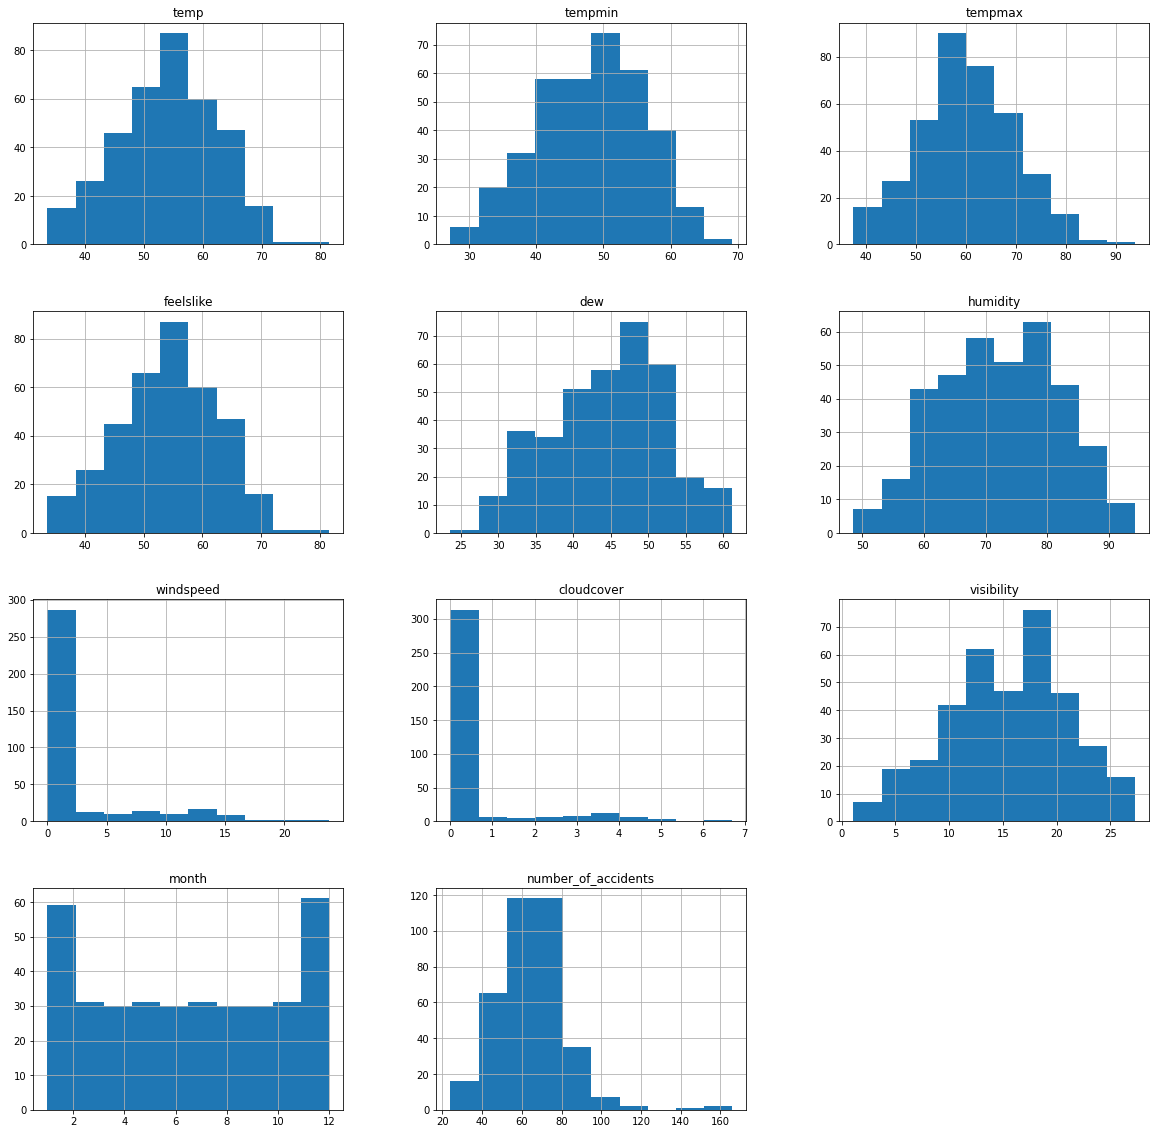

In [94]:
plt.figure()
dategrouped.hist(figsize=(20,20));

Build correlation matrix table. As a result we don't see a strong correlation of number of accidents with other variables.

<AxesSubplot:>

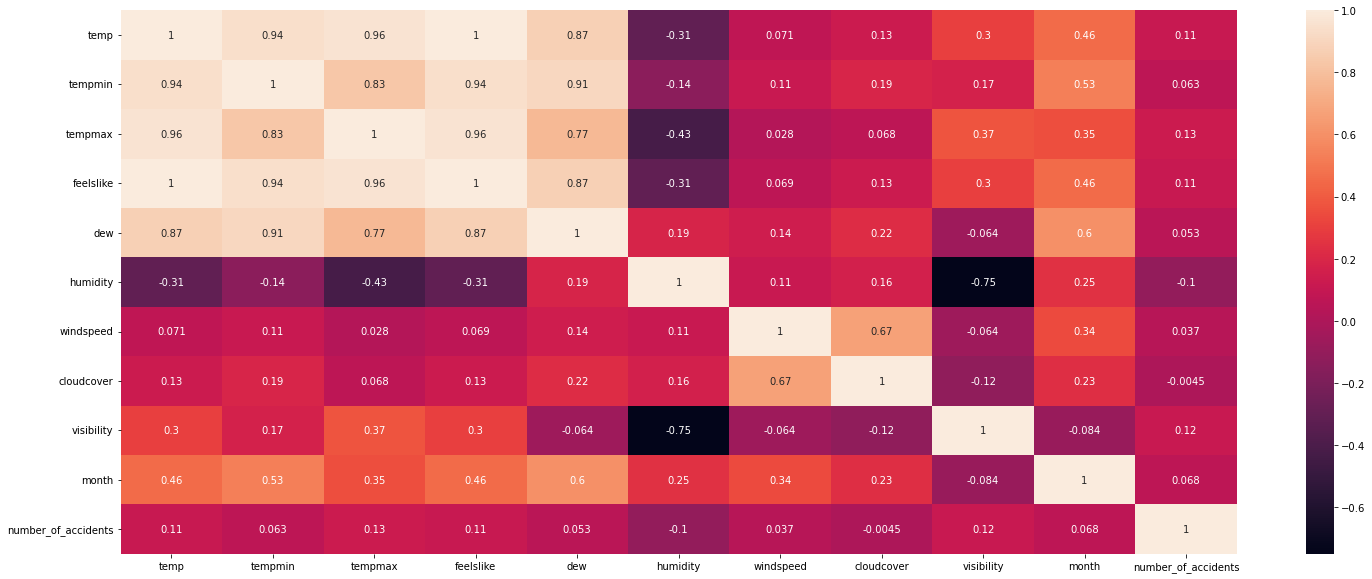

In [95]:
dategrouped_corr = dategrouped.corr()
plt.figure(figsize=(25,10))
sns.heatmap(dategrouped_corr, annot=True)

## Answering analytical questions

### Q: What are the patterns between number of accidents and weather conditions?

Build interactive plots with Bokeh

In [98]:
import bokeh
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

Look at how the number of accidents changes with daily temperature by season. On the chart all days are shown by one circle. Circles are colored based on the season. Please click on the legend entries to hide the corresponding lines.

In [116]:
p = figure( plot_width=600, plot_height=400)
p.title.text = 'Click on legend entries to hide the corresponding lines'


p.scatter(x= dategrouped[dategrouped['season']=='Summer']['number_of_accidents'],
           y=dategrouped[dategrouped['season']=='Summer']['temp'],
          color='lime', alpha=0.8, legend_label='Summer',
          muted_color='lime', muted_alpha=0.2,
          marker='circle', size=15)
p.scatter(x= dategrouped[dategrouped['season']=='Winter']['number_of_accidents'],
           y=dategrouped[dategrouped['season']=='Winter']['temp'],
          color='blue', alpha=0.8, legend_label='Winter',
          muted_color='blue', muted_alpha=0.2,
         marker='circle', size=15)
p.scatter(x= dategrouped[dategrouped['season']=='Spring']['number_of_accidents'],
           y=dategrouped[dategrouped['season']=='Spring']['temp'],
          color='pink', alpha=0.8, legend_label='Spring',
          muted_color='pink', muted_alpha=0.2,
          marker='circle', size=15)
p.scatter(x= dategrouped[dategrouped['season']=='Fall']['number_of_accidents'],
           y=dategrouped[dategrouped['season']=='Fall']['temp'],
          color='yellow', alpha=0.8, legend_label='Autumn',
          muted_color='yellow', muted_alpha=0.2,
         marker='circle', size=15)



p.legend.location = "top_right"
p.legend.click_policy="mute"

show(p)

There is nothing to conclude from the plot above, no clear association between number of accidents and temperature comparing it by season.

Let's also look at how the number of accidents changes with daily visibility by season. On the chart all days are shown by one circle. Circles are colored based on the season. Please click on the legend entries to hide the corresponding lines.

In [117]:
p = figure( plot_width=600, plot_height=400)
p.title.text = 'Click on legend entries to hide the corresponding lines'


p.scatter(x= dategrouped[dategrouped['season']=='Summer']['number_of_accidents'],
           y=dategrouped[dategrouped['season']=='Summer']['visibility'],
          color='lime', alpha=0.8, legend_label='Summer',
          muted_color='lime', muted_alpha=0.2,
          marker='circle', size=15)
p.scatter(x= dategrouped[dategrouped['season']=='Winter']['number_of_accidents'],
           y=dategrouped[dategrouped['season']=='Winter']['visibility'],
          color='blue', alpha=0.8, legend_label='Winter',
          muted_color='blue', muted_alpha=0.2,
         marker='circle', size=15)
p.scatter(x= dategrouped[dategrouped['season']=='Spring']['number_of_accidents'],
           y=dategrouped[dategrouped['season']=='Spring']['visibility'],
          color='pink', alpha=0.8, legend_label='Spring',
          muted_color='pink', muted_alpha=0.2,
          marker='circle', size=15)
p.scatter(x= dategrouped[dategrouped['season']=='Fall']['number_of_accidents'],
           y=dategrouped[dategrouped['season']=='Fall']['visibility'],
          color='yellow', alpha=0.8, legend_label='Autumn',
          muted_color='yellow', muted_alpha=0.2,
         marker='circle', size=15)



p.legend.location = "top_right"
p.legend.click_policy="mute"

show(p)

There is nothing to conclude from the plot above, no clear association between number of accidents and visibility comparing it by season.

Further, let's check at trends of variables:

1) Average number of accidents and temp

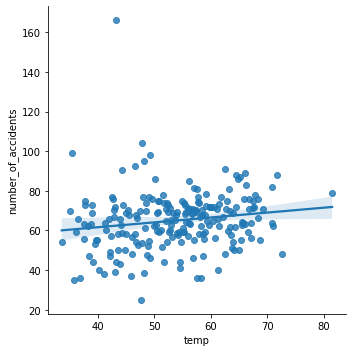

In [126]:
plot = dategrouped.groupby(["temp"]).mean("number_of_accidents").reset_index()
sns.lmplot(data=plot, x="temp", y="number_of_accidents")

From the plot above it can be noticed a positive relationship between number of accidents and temperature. So the number of accidents increases with temperature.

2) Average number of accidents and feelslike temp

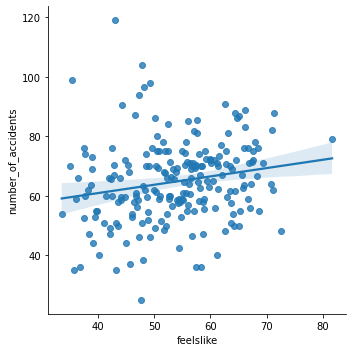

In [127]:
plot = dategrouped.groupby(["feelslike"]).mean("number_of_accidents").reset_index()
sns.lmplot(data=plot, x="feelslike", y="number_of_accidents")

From the plot above it can be noticed a same relationship between number of accidents and feelslike as with  temperature. 

3) Windspeed and number of accidents

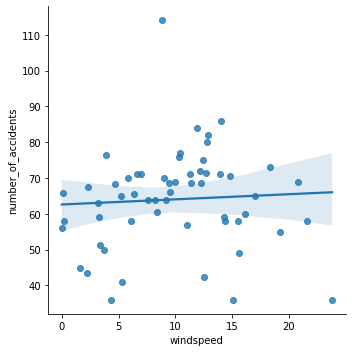

In [151]:
plot = dategrouped.groupby(["windspeed"]).mean("number_of_accidents").reset_index()
sns.lmplot(data=plot, x="windspeed", y="number_of_accidents")

We expected that with higher windspeed there are more accidents, but plot doesn't show such relationship.

4) Visibility and number of accidents

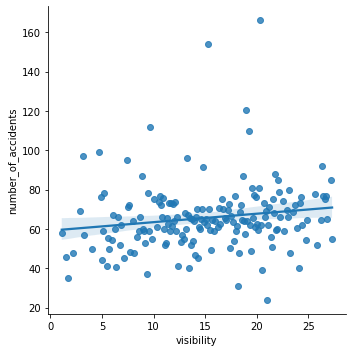

In [152]:
plot = dategrouped.groupby(["visibility"]).mean("number_of_accidents").reset_index()
sns.lmplot(data=plot, x="visibility", y="number_of_accidents")

From the plot above we can see a positive pattern between number of accidents and visibility.

5) Cloudcover and number of accidents

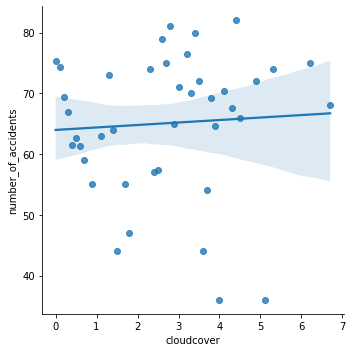

In [153]:
plot = dategrouped.groupby(["cloudcover"]).mean("number_of_accidents").reset_index()
sns.lmplot(data=plot, x="cloudcover", y="number_of_accidents")